In [1]:
import matplotlib as mat              #as mat 추가
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  #추가
import pandas as pd
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:

## 폰트 경로
font_path = 'NanumGothic.ttf'
 
## FontProperties 인스턴스 생성
font_prop = fm.FontProperties(fname=font_path)
 
## 폰트 이름
font_name = font_prop.get_name()
 
## 폰트 일괄 설정
mat.rc('font',family=font_name)

In [3]:
data = pd.read_csv("중복값제거.csv")

In [4]:
#data1 = data[data['keyword'] == '성공 마인드'].index
#data = data.drop(data1)
# 키워드 '성공 마인드', '직무교육' 삭제

data

,Unnamed: 0,content,keyword,site
0,0,라코레 자개공예 와인오프너 특별한 집들이선물로 딱!,공예,네이버
1,1,[삼청동] 서울공예박물관 & 조선김밥,공예,네이버
2,2,이색취미 비즈공예:코바늘뜨기로 시드비즈 목걸이만들기(도안),공예,네이버
3,3,종이공예 눈꽃송이 눈결정체 만들기(도안 포함),공예,네이버
4,4,취미생활추천 지점토 공예 화분 만들기,공예,네이버
...,...,...,...,...
23476,27603,#오늘의뉴스 2021년 1월 14일 1. 코로나 ‘집콕’에 ‘확찐’ 아이들 → 가톨...,아동 교육,블라인드
23477,27605,"이렇게 많이 글을 쓰게 될줄 몰랐네요. 많은 분들이 쪽지주셔서 어딘지 물어보시고, ...",아동 교육,블라인드
23478,27607,"어느날, 별거없는 초등학생 고아 몇 명 앞에 책임감이 투철한 교사가 무릎꿇고 빌게 ...",아동 교육,블라인드
23479,27608,"#오늘의뉴스 2020년 9월7일 1. 당정청, 7조원대 4차 추경 합의 → 전 국민...",아동 교육,블라인드


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  23481 non-null  int64 
 1   content     23481 non-null  object
 2   keyword     23481 non-null  object
 3   site        23481 non-null  object
dtypes: int64(1), object(3)
memory usage: 733.9+ KB


In [6]:
#키워드(카테고리)만 list화

keyword = list(set(data['keyword']))
len(keyword)

22

In [7]:
#conents(내용)에 해당하는 부분만 'docs'라는 리스트로 만듦

docs = list(data['content'])

In [8]:
docs

['라코레 자개공예 와인오프너 특별한 집들이선물로 딱!',
 '[삼청동] 서울공예박물관 & 조선김밥',
 '이색취미 비즈공예:코바늘뜨기로 시드비즈 목걸이만들기(도안)',
 '종이공예 눈꽃송이 눈결정체 만들기(도안 포함)',
 '취미생활추천 지점토 공예 화분 만들기',
 '동네에서 선물 받은 박으로 작품 구상중, 박공예 아이디어 공유',
 '공예 트렌드 페어',
 '칠보공예 자격증시험 있었어요',
 '[공지] 마일로브공방 12월 수강생모집 ;낙성대가죽공방, 서울대가죽공방, 가죽공예배우기, 가죽공예, 취미생활',
 '신설동 가죽공예 시장 투어 / 가성비 좋은 크롬 가죽 <레더 에펠>',
 '창문에 유리공예 썬캐쳐 달아주고 홈데코 하기',
 ': 안산 가죽공방 : 가죽공방체험 이색데이트 커플 에어팟케이스 만들기 / 에어팟가죽케이스 원데이클래스 / 수원, 안양, 인천, 시흥, 화성, 안산 / 팍스팩토리 안산 가죽공예',
 '펠트공예 손바느질로 지퍼파우치 만들기(지퍼달기 방법)',
 ' [ 가죽공예/ 오뜨 가죽공방 수강생작품 ]  호피무늬 백팩 (가죽 & 캔버스 ) 만들기 _ ooitw',
 '집순이취미 라탄공예 마크라메 원형 리스만들기 diy ',
 '인천 손바느질로 하는 퀼트공예~~~',
 '봉투로 페이퍼플라워 눈결정 종이꽃 만들기 (종이공예)',
 '가죽공예 마아블링기법 핸드폰케이스만들기~*가죽공예자격증*가죽공예취미*가죽공방창업*평생교육바우처',
 '신설동 가죽공예 부자재 구입 시 주차장 소개 <천일민영주차장>',
 '2021 공예트렌드페어 : 형형색색',
 '은점토공예 기초과정 시작',
 ': 안산 가죽공방 : 타로카드 가죽케이스 만들기 원데이클래스 / 가죽케이스 만들기 / 수원, 안양, 인천, 시흥, 화성, 안산 가죽공예 팍스팩토리 안산 가죽공방',
 '지점토공예 폴리머클레이로 할로윈소품 led캔들홀더 만들기',
 '신도림 가죽공방 가죽공예 아카데미 벨트줄 교체',
 '더쓰임 스튜디오와 함께한 대구 라탄 공예 후기!',
 '이색 취미추천 매듭공예법으로 태슬 만

In [9]:
# keyword 개수 파악
df_data1=data.drop(['Unnamed: 0', 'site' ], axis=1)

df_cout = df_data1.groupby(['keyword']).count() 
df_cout

,content
keyword,
개발,1240
공예,680
글쓰기,565
금융,1130
데이터,1286
드로잉,1516
디자인,1681
베이킹,906
부업,1395


<BarContainer object of 22 artists>

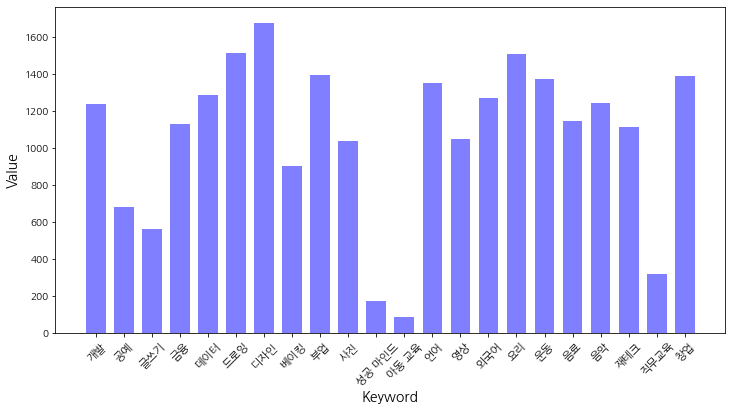

In [10]:
plt.figure(figsize=(12, 6)) 
xs=df_cout.index.to_list()
ys=df_cout['content'].to_list() 

plt.xlabel('Keyword', fontsize=14) 
plt.ylabel('Value', fontsize=14) 
plt.xticks(fontsize=11, rotation=45)
plt.bar(xs, ys, width=0.7, color='b', alpha=0.5) 


# 예측치 비교 시각화
NMF 모델 끌어와서 진행해야함. (단독 실행 불가)

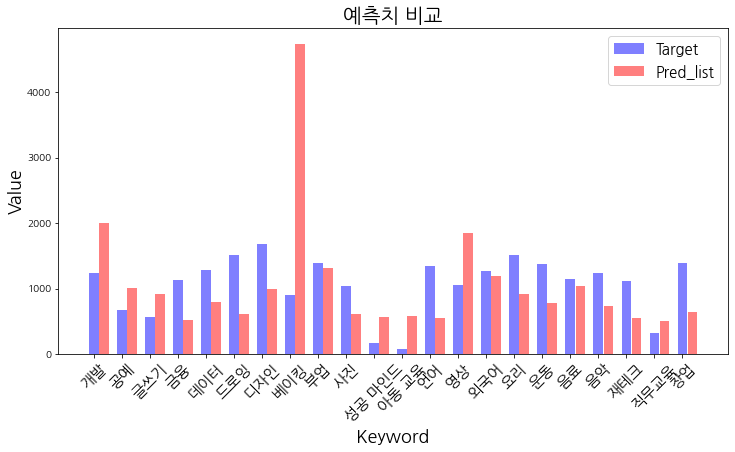

In [15]:
plt.figure(figsize=(12, 6)) 

x=np.arange(len(xs))
bar_width = 0.35

p1 = plt.bar(x, df_cout['content'].to_list(), bar_width, color='b', alpha=0.5, label='Target')
p2 = plt.bar(x+0.36, pred_list, bar_width, color='r', alpha=0.5, label='Pred_list')


plt.title('예측치 비교', fontsize=20)
plt.ylabel('Value', fontsize=18)
plt.xlabel('Keyword', fontsize=18)
plt.xticks(x, xs, fontsize=15, rotation=45)
plt.legend((p1[0], p2[0]), ('Target', 'Pred_list'), fontsize=15)
plt.show()

# 신규 데이터로 Test

In [55]:
#오늘일기에 작성된 글(전처리 과정 거침)을 list로 불러옴

from csv import reader

with open('testdata_list.csv', 'r', encoding='UTF-8') as csv_file:
    csv_reader = reader(csv_file)
    # Passing the cav_reader object to list() to get a list of lists
    list_of_rows = list(csv_reader)
    print(list_of_rows)

[['일과', '새벽', '식사', '준비', '등원', '등교', '준비', '집', '아침', '디즈니', '스타워즈', '청소', '설거지', '점심', '후다닥', '케이크', '사고', '책', '반납', '및', '대여', '애', '다시', '저녁', '식사', '후', '설거지', '정리', '방학', '기념', '케이크', '오늘', '방학', '날', '월', '일', '어', '두운', '날', '두', '아이', '벌써', '뭘', '하나', '걱정', '마음', '오늘', '아이', '위해', '동선', '상의', '케이크', '가게', '검색', '후', '출발', '너도밤나무', '제과점', '이름', '곳', '종류', '처음', '케이크', '가게', '홀', '케이크', '손', '점원', '무엇', '영어', '말', '제일', '인기', '건', '사진', '앞쪽', '거기', '초코', '코팅', '고심', '끝', '그', '두', '가지', '독일', '통방', '치즈', '케이크', '를', '역시', '종이', '포장', '환경', '진심', '사람', '년', '전통', '곳', '내', '고민', '공', '내', '봉투', '뭐', '독일인', '할아버지', '대체', '뭘', '한국', '문화원', '기존', '대여', '도서', '반납', '책', '한국', '책갈피', '트리', '장식', '혼자', '전시', '눈길', '둘', '틈', '대중', '교통', '어제', '오늘', '조금', '눈', '지하철', '선택', '알', '아들', '수', '안내', '방송', '출발', '간다', '하교', '시간', '늦', '것', '연락', '남편', '답', '주변', '람', '영어', '못', '지하철', '독일', '생활', '최초', '택시', '로', '무사', '도착', '방학', '기념', '케이크', '시식', '나이테', '켜', '바움쿠헨', '맛', '밀도', '식감', '도', '

In [56]:
#전처리 완료된 test글을 문장화

test_data = ' '.join(list_of_rows[0])

<Figure size 432x288 with 0 Axes>

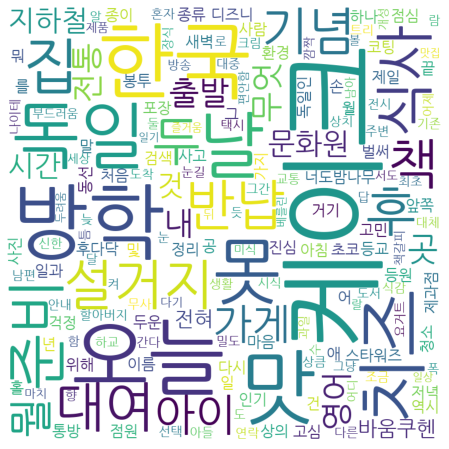

In [57]:

wc1 = WordCloud(max_font_size=200, font_path = 'NanumGothic.ttf', 
                background_color='white', width=800, height=800)

wc1.generate(test_data)

plt.tight_layout(pad=0)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(wc1)
plt.show()